<IPython.core.display.Javascript object>


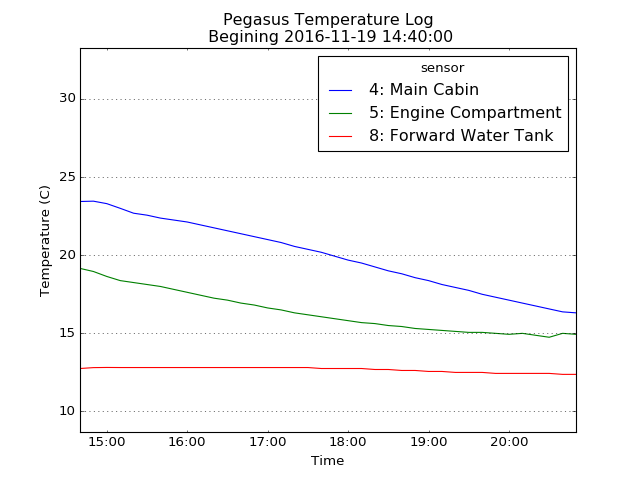

In [40]:
#Import Libraries
% matplotlib notebook
import numpy as np
from scipy import interpolate
import pandas as pd
from datetime import datetime

#---Data Source & Header info    
url = 'https://raw.githubusercontent.com/slawler/PegasusLogs/master/Temperature/Temperature.log'
cols = ['time','sensor', 'obs']    

#Read & Format Data Table
def Observations_Table():
    df= pd.read_csv(url, header = None, sep = '\t' ,names = cols)
    df= df.set_index(pd.to_datetime(df['time'],format = '%d.%Y.%m %H:%M:%S'))
    df.drop(labels='time',axis=1, inplace= True)
    df = df.groupby([pd.TimeGrouper('{}min'.format(5)), 'sensor']).agg({'obs': np.mean})
    df = df.unstack()
    df.columns = df.columns.droplevel()
    #df = df.resample('100min').mean()
    df =df.resample('10min').mean()
    df = df.interpolate(method = 'cubic')
    df['4: Main Cabin'] = df[4]
    df['5: Engine Compartment'] = df[5]
    df['8: Forward Water Tank'] = df[8]
    df.drop(labels = [4,5,8],axis=1,inplace =True )
    return df


#Plot Data
def Plot_Maker(df):
    import matplotlib.pyplot as plt
    fig = df.plot()
    plt.title('Pegasus Temperature Log'+ '\n Begining {}'.format(df.index[0]))
    plt.ylabel('Temperature (C)')
    plt.xlabel('Time')
    plt.grid(True)
    y_min = df.min().mean()*0.6
    y_max = df.max().mean()*1.8
    plt.ylim((y_min,y_max))
    

df = Observations_Table()
p = Plot_Maker(df)

#mins, maxes = df.min().round(), df.max().round()
#print ('Maximum Temperatures: \n','\t', maxes)
#print ('\nMinimum Temperatures: \n', '\t',mins)
